In [1]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import logging
logging.basicConfig(level=logging.INFO)
from extractors.loader import Loader

In [4]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"

In [5]:
loader = Loader(dataDir, 'inD')

## Some helper methods to get information of all recordings
Uncomment and run to see output

In [6]:
# rMeta = loader.getAllRecordingMeta() # All the meta files
# print(rMeta[0])

In [7]:
loader.locationToRecordingIds

{4: [0, 1, 2, 3, 4, 5, 6],
 1: [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 2: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 3: [30, 31, 32]}

In [8]:
# loader.getRecordingIdsOfALocation(1)

# Recording Specific methods

In [9]:
recordingData = loader.getRecordingData('18') # loads the recording with id 18

In [10]:
# recordingData.tracksMetaDf.head()
# recordingData.tracksDf.tail()

In [11]:
# recordingData.getPedIds() # All the pedestrian Ids in the recording

In [12]:

# pedFrames = loader.extractPedFrames(recordingData.tracksMetaDf, recordingData.tracksDf)
# pedFrames.tail()

In [13]:
# crossingIds = recordingData.getCrossingPedIds()
# recordingData.getCrossingPedIds() # only the ids who crosses the road.

In [14]:
# crossingDf = recordingData.getCrossingDf()
# crossingDf.head()

# LocationData - for aggregation

**get all the unique crossing ids**
```
loc2data = loader.getLocationData(2)
loc2data.getUniqueCrossingIds()
```
**get all the crossing data**
```
loc2data = loader.getLocationData(2)
crossingDf = loc2data.getCrossingDf()
```

In [37]:
loc2data = loader.getLocationData(2)

INFO:root:recordingIds: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [16]:
# loc2data.getUniqueCrossingIds()

In [17]:
# crossingDf = loc2data.getCrossingDf() # get all crossing data

In [18]:
# crossingDf.head()
# crossingDf.tail()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,lonVelocity,latVelocity,lonAcceleration,latAcceleration,uniqueTrackId
0,18,1,0,0,32.13296,-19.08257,264.45315,0.0,0.0,-0.07239,-1.51998,-0.20766,0.17799,1.51986,-0.07487,-0.15709,0.22390,18001
1,18,1,1,1,32.12978,-19.14328,264.39476,0.0,0.0,-0.08051,-1.51388,-0.21197,0.18312,1.51451,-0.06774,-0.16154,0.22885,18001
2,18,1,2,2,32.12634,-19.20393,264.32149,0.0,0.0,-0.08879,-1.50747,-0.21644,0.18902,1.50886,-0.06081,-0.16668,0.23408,18001
3,18,1,3,3,32.12261,-19.26463,264.23384,0.0,0.0,-0.09724,-1.50061,-0.22107,0.19557,1.50279,-0.05402,-0.17237,0.23960,18001
4,18,1,4,4,32.11867,-19.32531,264.13236,0.0,0.0,-0.10592,-1.49317,-0.22584,0.20255,1.49617,-0.04728,-0.17840,0.24537,18001


In [19]:
# crossingDf[crossingDf['uniqueTrackId'] == 18001]

In [20]:
# loc2data.getSceneConfig() # scene configuration 

# Extracting scene data

In [82]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [44]:
pedDf = crossingDf[crossingDf['uniqueTrackId'] == 18001]

In [56]:
splines = TrajectoryUtils.dfToSplines(pedDf, 'xCenter', 'yCenter', 1)
(x, y) = splines.xy
print(np.array(x))

[32.13296 32.02216 31.74821 31.37277 31.02194 30.68069 30.23967 29.51279
 28.70589 28.02859 27.40982 26.7739  26.14379 25.33379 24.38074 23.40634
 22.39725 21.38773 20.37847 19.41474 18.47334 17.70889 16.9982  16.39771
 15.97277 15.64393 15.44685 15.28162 15.09274 14.97506 14.90452 14.73923
 14.25039 13.48242 12.57163 12.35633]


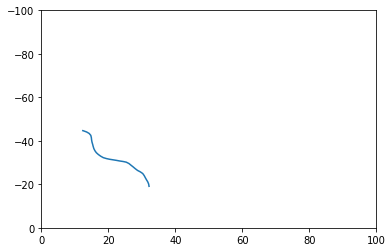

In [24]:
plt.plot(*splines.xy)
plt.xlim([0, 100])
plt.ylim([-100, 0])
plt.gca().invert_yaxis()

In [25]:
# sceneDf = loc2data.getSceneCrossingDf(1, 10, 10)

In [26]:
# sceneDf.head()

In [27]:
# len(sceneDf.uniqueTrackId.unique())

In [28]:
# len(crossingDf.uniqueTrackId.unique()) 

2022-09-08 01:22:55.282 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


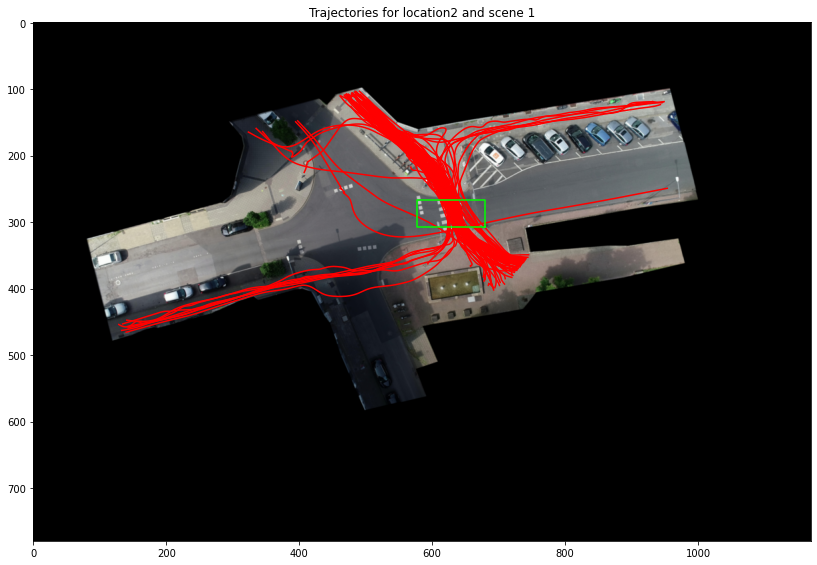

In [83]:
sceneData = loc2data.getSceneCrossingData(1, 10, 4, refresh=True)
visualizer.showLocationSceneData(sceneData)

2022-09-08 01:23:14.922 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


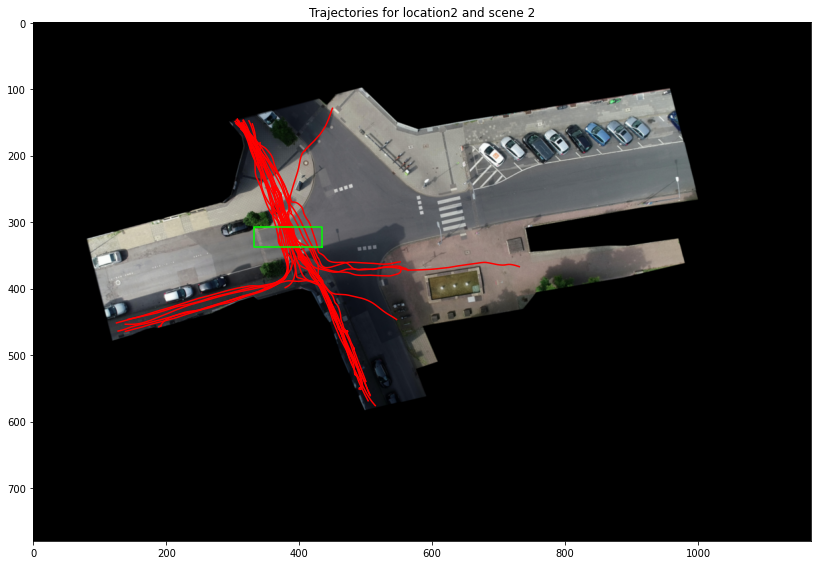

In [84]:
scene2Data = loc2data.getSceneCrossingData(2, 10, 3, refresh=True)
visualizer.showLocationSceneData(scene2Data)

2022-09-08 01:21:29.186 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


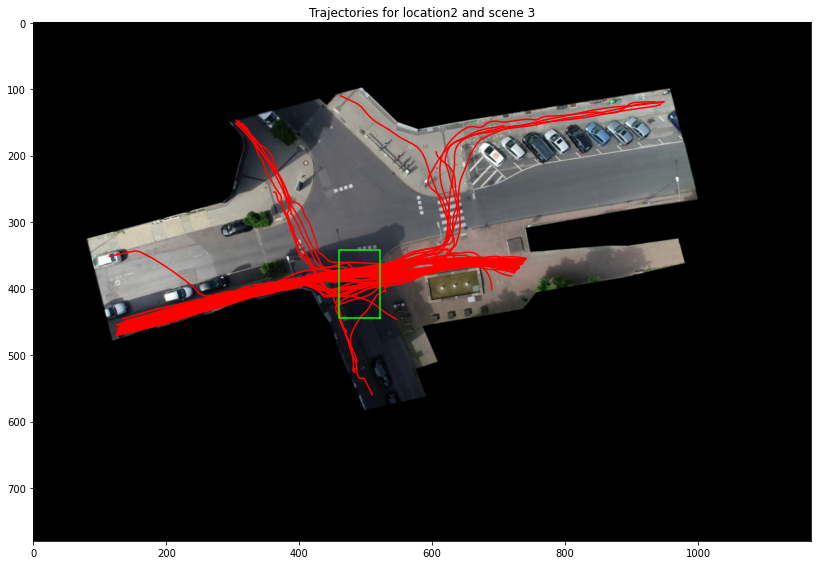

In [79]:
scene3Data = loc2data.getSceneCrossingData(3, 3, 10, refresh=True)
visualizer.showLocationSceneData(scene3Data)

2022-09-08 01:14:36.710 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


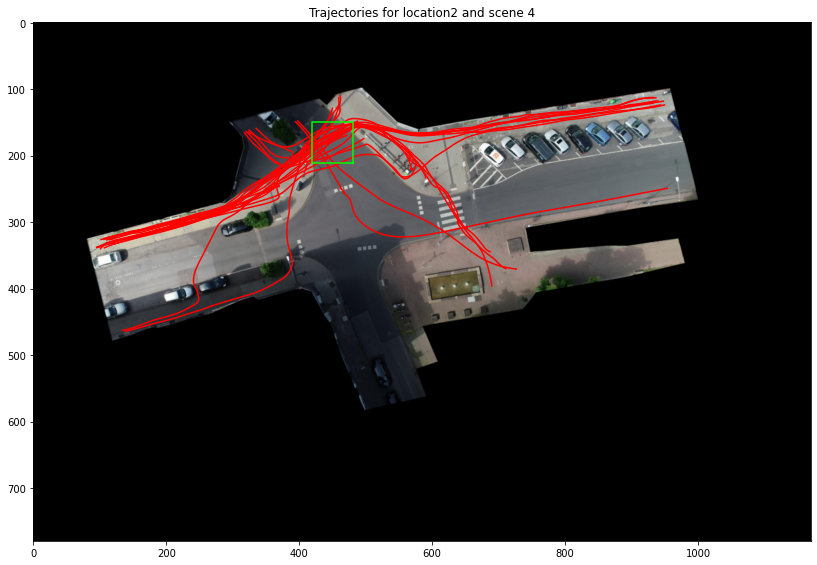

In [66]:
scene4Data = loc2data.getSceneCrossingData(4, 6, 6)
visualizer.showLocationSceneData(scene4Data)

In [ ]:
scene5Data = loc2data.getSceneCrossingData(5, 20, 3, refresh=True)
visualizer.showLocationSceneData(scene5Data)

In [ ]:
scene6Data = loc2data.getSceneCrossingData(6, 2, 10, refresh=True)
visualizer.showLocationSceneData(scene6Data)